In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
data=pd.read_csv("C:/Users/Admin/Downloads/customer-churn-data.csv")
data=data.drop("CustomerID",axis=1)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   1000 non-null   int64  
 1   Gender                1000 non-null   object 
 2   AnnualIncome          1000 non-null   float64
 3   TotalSpend            1000 non-null   float64
 4   YearsAsCustomer       1000 non-null   int64  
 5   NumOfPurchases        1000 non-null   int64  
 6   AvgTransactionAmount  1000 non-null   float64
 7   NumOfReturns          1000 non-null   int64  
 8   NumOfSupportQueries   1000 non-null   int64  
 9   SatisfactionScore     1000 non-null   int64  
 10  LastPurchaseDaysAgo   1000 non-null   int64  
 11  EmailOptIn            1000 non-null   bool   
 12  PromotionResponse     1000 non-null   object 
 13  Churn                 1000 non-null   bool   
dtypes: bool(2), float64(3), int64(7), object(2)
memory usage: 95.8+ KB


In [4]:
data.describe()

,Age,AnnualIncome,TotalSpend,YearsAsCustomer,NumOfPurchases,AvgTransactionAmount,NumOfReturns,NumOfSupportQueries,SatisfactionScore,LastPurchaseDaysAgo
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,43.267000,111.962960,5080.79265,9.727000,49.456000,266.876530,4.612000,1.934000,2.974000,182.890000
std,15.242311,52.844111,2862.12335,5.536346,28.543595,145.873445,2.896869,1.402716,1.391855,104.391319
min,18.000000,20.010000,108.94000,1.000000,1.000000,10.460000,0.000000,0.000000,1.000000,1.000000
25%,30.000000,67.800000,2678.67500,5.000000,25.000000,139.682500,2.000000,1.000000,2.000000,93.000000
50%,43.000000,114.140000,4986.19500,9.000000,49.000000,270.100000,5.000000,2.000000,3.000000,180.500000
75%,56.000000,158.452500,7606.47000,14.000000,74.000000,401.602500,7.000000,3.000000,4.000000,274.000000
max,69.000000,199.730000,9999.64000,19.000000,99.000000,499.570000,9.000000,4.000000,5.000000,364.000000


In [5]:
data.isnull().sum()        #no missing values

Age                     0
Gender                  0
AnnualIncome            0
TotalSpend              0
YearsAsCustomer         0
NumOfPurchases          0
AvgTransactionAmount    0
NumOfReturns            0
NumOfSupportQueries     0
SatisfactionScore       0
LastPurchaseDaysAgo     0
EmailOptIn              0
PromotionResponse       0
Churn                   0
dtype: int64

# Pair Grid Plot

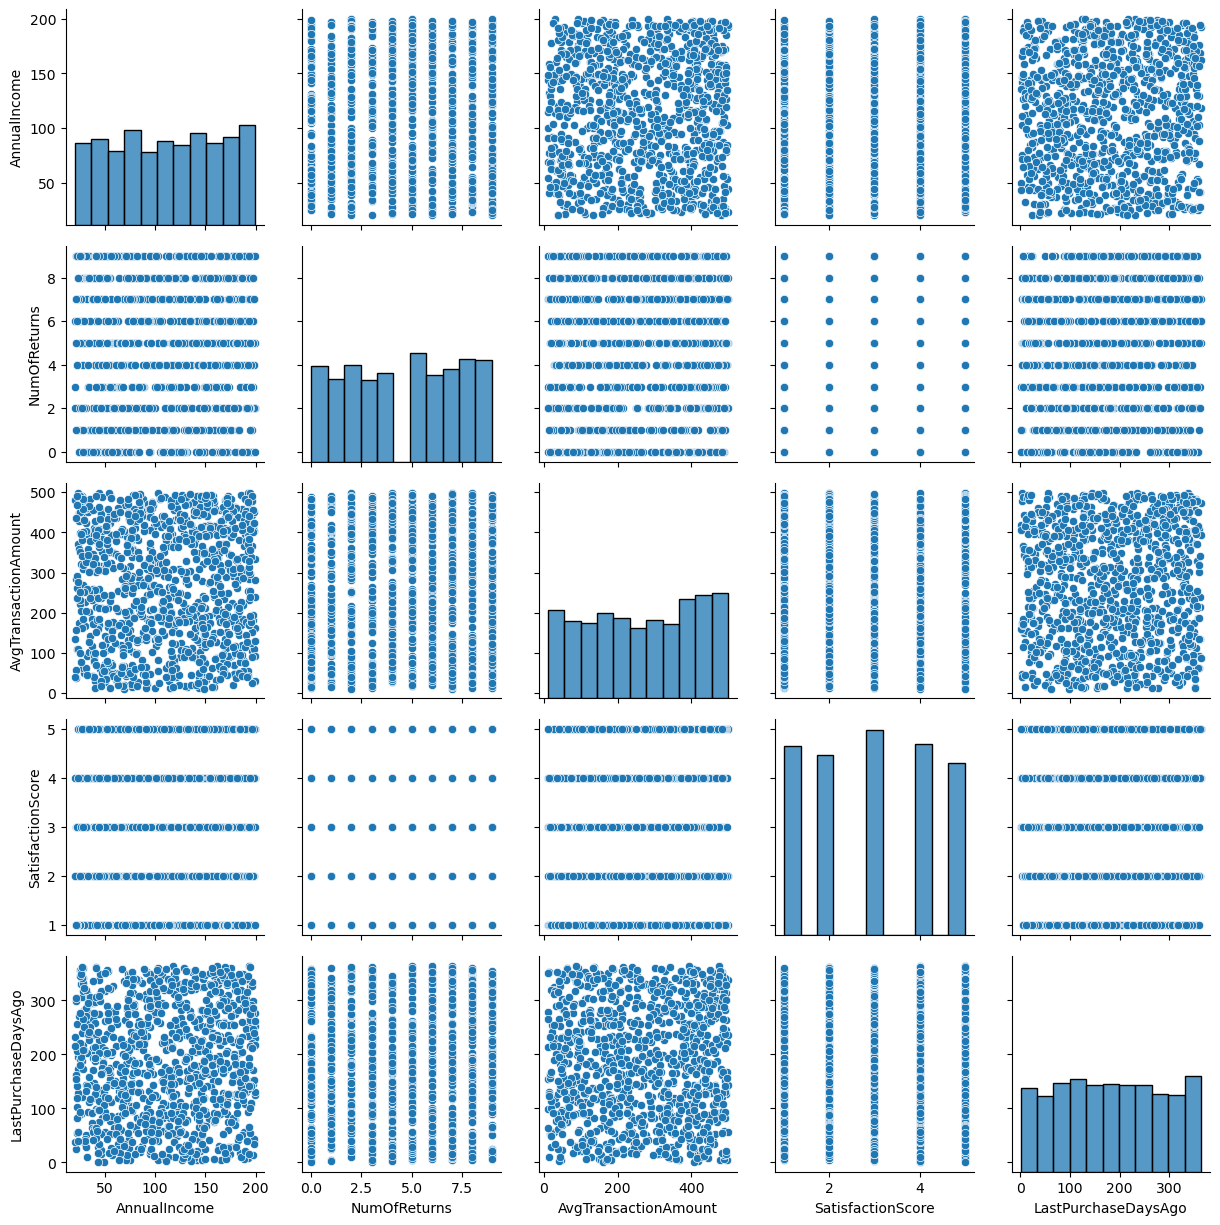

In [6]:
g = sns.PairGrid(data[['AnnualIncome', 'NumOfReturns', 'AvgTransactionAmount', 'SatisfactionScore', 'LastPurchaseDaysAgo']])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)


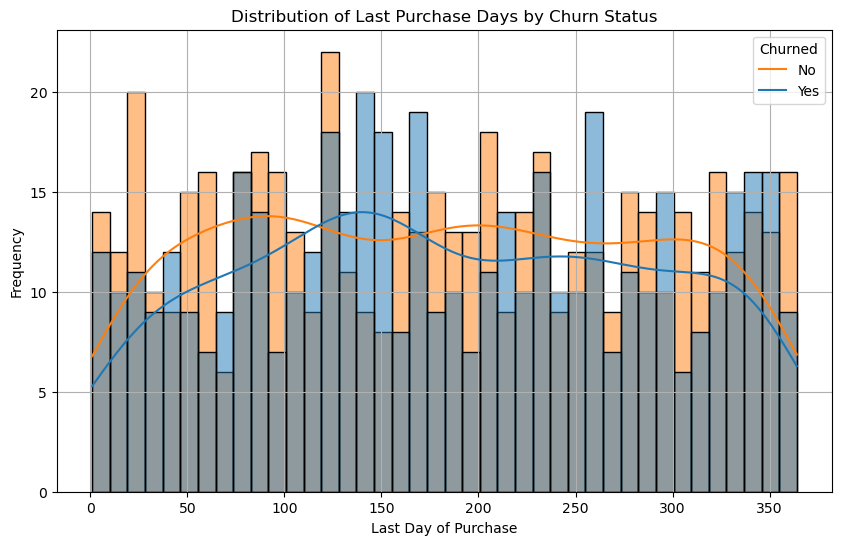

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame called df with columns 'churned' and 'last_purchase_day'
churned = data['Churn']
last_purchase_day = data['LastPurchaseDaysAgo']

# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='LastPurchaseDaysAgo', hue='Churn', bins=40, kde=True)
plt.xlabel('Last Day of Purchase')
plt.ylabel('Frequency')
plt.title('Distribution of Last Purchase Days by Churn Status')
plt.legend(title='Churned', labels=['No', 'Yes'])
plt.grid(True)
plt.show()


In [8]:
data["LogTotalSpend"] = data["TotalSpend"].apply(lambda x: math.log10(x))
data["Logannual"]= data["AnnualIncome"].apply(lambda x: math.log10(x))+5


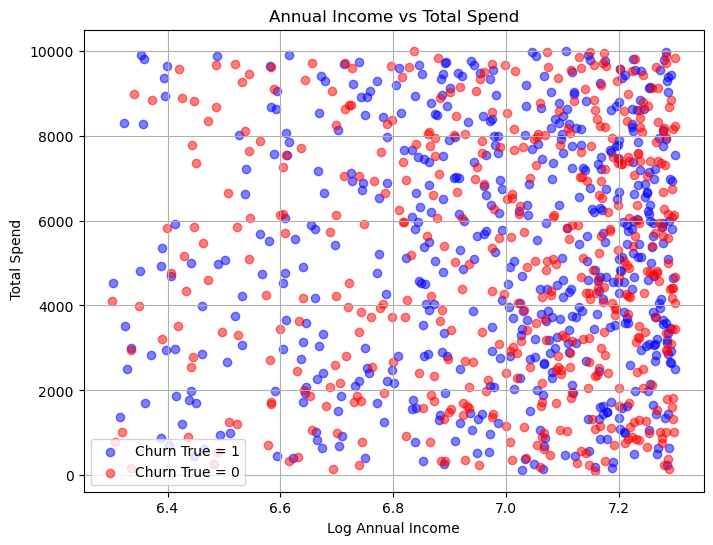

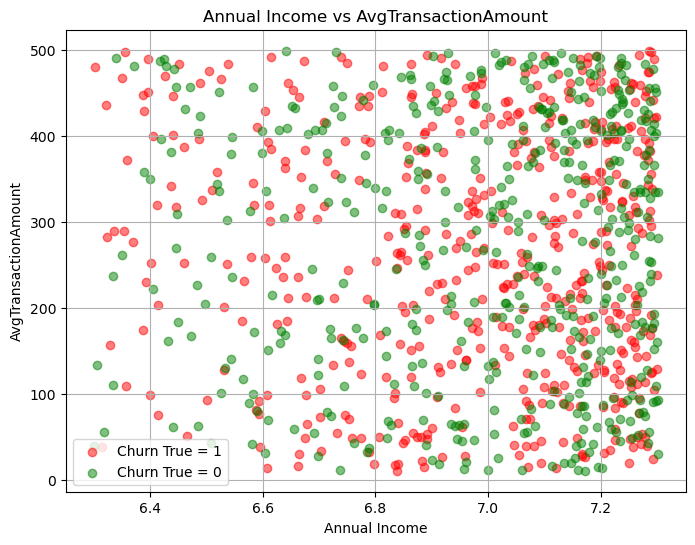

In [9]:
churn_true_1 = data[data["Churn"] == 1]
churn_true_0 = data[data["Churn"] == 0]

plt.figure(figsize=(8, 6))
plt.scatter(churn_true_1["Logannual"], churn_true_1["TotalSpend"], color='blue', alpha=0.5, label='Churn True = 1')
plt.scatter(churn_true_0["Logannual"], churn_true_0["TotalSpend"], color='red', alpha=0.5, label='Churn True = 0')
plt.title('Annual Income vs Total Spend')
plt.xlabel('Log Annual Income')
plt.ylabel(' Total Spend')
plt.legend() 
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(churn_true_1["Logannual"], churn_true_1["AvgTransactionAmount"], color='red', alpha=0.5, label='Churn True = 1')
plt.scatter(churn_true_0["Logannual"], churn_true_0["AvgTransactionAmount"], color='green', alpha=0.5, label='Churn True = 0')
plt.title('Annual Income vs AvgTransactionAmount')
plt.xlabel('Annual Income')
plt.ylabel('AvgTransactionAmount')
plt.grid(True)
plt.legend()
plt.show()


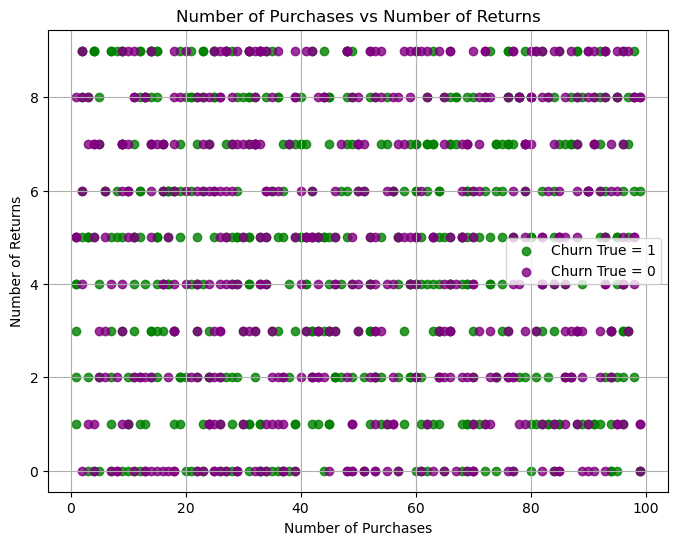

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(churn_true_1["NumOfPurchases"], churn_true_1["NumOfReturns"], color='green', alpha=0.8, label='Churn True = 1')
plt.scatter(churn_true_0["NumOfPurchases"], churn_true_0["NumOfReturns"], color='purple', alpha=0.8, label='Churn True = 0')
plt.title('Number of Purchases vs Number of Returns')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Returns')
plt.legend()
plt.grid(True)
plt.show()


In [21]:
carvar=["Gender","EmailOptIn","PromotionResponse","Churn"]
for c in carvar:
    data[c]=label_encoder.fit_transform(data[c])

In [23]:
label_encoder=LabelEncoder()

In [24]:
data["Churn"] = label_encoder.fit_transform(data["Churn"])

In [27]:
y=data["Churn"]
x=data.drop("Churn",axis=1)

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [29]:
x_train.shape

(700, 16)

# Random Forest Classifier

In [34]:
rf=RandomForestClassifier(max_depth=4,random_state=86)
rf.fit(x_train,y_train)
rfpred=rf.predict(x_test)
randomforestaccscore=accuracy_score(y_test,rfpred)
randomforestaccscore


0.5866666666666667

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=2,random_state=73)
rf.fit(x_train,y_train)
rfpred=rf.predict(x_test)
randomforestaccscore=accuracy_score(y_test,rfpred)
print(randomforestaccscore)
accuracy_score(y_train,rf.predict(x_train))

0.5933333333333334


0.6085714285714285

In [51]:

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_classifier = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_model = grid_search.best_estimator_

test_predictions = best_model.predict(x_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy:", test_accuracy)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
370 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Admin\anaconda3\Lib\site-packa

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Score: 0.51
Test Accuracy: 0.5066666666666667


## ADA Boosting-Decision Tree

In [252]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   1000 non-null   int64  
 1   Gender                1000 non-null   object 
 2   AnnualIncome          1000 non-null   float64
 3   TotalSpend            1000 non-null   float64
 4   YearsAsCustomer       1000 non-null   int64  
 5   NumOfPurchases        1000 non-null   int64  
 6   AvgTransactionAmount  1000 non-null   float64
 7   NumOfReturns          1000 non-null   int64  
 8   NumOfSupportQueries   1000 non-null   int64  
 9   SatisfactionScore     1000 non-null   int64  
 10  LastPurchaseDaysAgo   1000 non-null   int64  
 11  EmailOptIn            1000 non-null   bool   
 12  PromotionResponse     1000 non-null   object 
 13  Churn                 1000 non-null   int64  
 14  LogTotalSpend         1000 non-null   float64
 15  Logannual             

In [253]:
scaler=StandardScaler()

In [254]:
data1["YearsAsCustomer"]=scaler.fit_transform(data1[["YearsAsCustomer"]])
data1["SatisfactionScore"]=scaler.fit_transform(data1[["SatisfactionScore"]])
data1["LastPurchaseDaysAgo"]=scaler.fit_transform(data1[["LastPurchaseDaysAgo"]])
data1["spend_ratio"]=scaler.fit_transform(data1[["spend_ratio"]])
data1["NumOfPurchases"]=scaler.fit_transform(data1[["NumOfPurchases"]])
data1["NumOfSupportQueries"]=scaler.fit_transform(data1[["NumOfSupportQueries"]])

In [256]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   1000 non-null   int64  
 1   Gender                1000 non-null   int32  
 2   AnnualIncome          1000 non-null   float64
 3   TotalSpend            1000 non-null   float64
 4   YearsAsCustomer       1000 non-null   int64  
 5   NumOfPurchases        1000 non-null   int64  
 6   AvgTransactionAmount  1000 non-null   float64
 7   NumOfReturns          1000 non-null   int64  
 8   NumOfSupportQueries   1000 non-null   int64  
 9   SatisfactionScore     1000 non-null   int64  
 10  LastPurchaseDaysAgo   1000 non-null   int64  
 11  EmailOptIn            1000 non-null   int64  
 12  PromotionResponse     1000 non-null   int32  
 13  Churn                 1000 non-null   int64  
 14  LogTotalSpend         1000 non-null   float64
 15  Logannual             

In [257]:
x=data1.drop("Churn",axis=1)
y=data1['Churn']

In [258]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [259]:
trr= DecisionTreeClassifier()
trr.fit(x_train,y_train)
accuracy = accuracy_score(trr.predict(x_test),y_test)
train_accuracy= accuracy_score(trr.predict(x_train),y_train)
print("Accuracy:", accuracy,train_accuracy)

Accuracy: 0.5 1.0


In [260]:
trr= DecisionTreeClassifier()
ada_boost = AdaBoostClassifier(estimator=trr, n_estimators=100, random_state=42)
ada_boost.fit(x_train, y_train)
y_pred = ada_boost.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.532


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [261]:
param_grid = {
    'n_estimators': [400,800,1000],  
    'algorithm': ['SAMME', 'SAMME.R']  
}
ada=AdaBoostClassifier(random_state=42)

In [262]:
grid_search=GridSearchCV(estimator=ada,param_grid=param_grid,cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'n_estimators': [400, 800, 1000]},
             verbose=2)

In [263]:
best_param=grid_search.best_params_
best_param

{'algorithm': 'SAMME.R', 'n_estimators': 800}

In [264]:
best_model = grid_search.best_estimator_
accuracy = best_model.score(x_test, y_test)
train_accuracy= best_model.score(x_train, y_train)
print("Accuracy:", accuracy,train_accuracy)       #accuracy increased by reducing overfitting

Accuracy: 0.54 0.8426666666666667


## ADA Boosting-Logistic Regression

In [265]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
p=logreg.predict(x_test)
accuracy_score(p,y_test)

0.516

In [266]:
ada=AdaBoostClassifier(estimator=logreg)

In [267]:
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of weak learners (decision trees)
    'learning_rate': [0.01, 0.1, 1.0],  # Learning rate, controls the contribution of each weak learner
    'estimator': [logreg],  # Base estimator to be used (e.g., decision tree). None means DecisionTreeClassifier(max_depth=1) will be used.
    'algorithm': ['SAMME', 'SAMME.R']  # Algorithm to use for boosting
}


In [268]:
grid_search=GridSearchCV(estimator=ada,param_grid=param_grid,cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train,y_train) 

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(estimator=LogisticRegression()),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'estimator': [LogisticRegression()],
                         'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [275]:
from sklearn.metrics import confusion_matrix, classification_report

best_model = grid_search.best_estimator_

accuracy = best_model.score(x_test, y_test)
train_accuracy = best_model.score(x_train, y_train)

print("Accuracy (Test Set):", accuracy)
print("Accuracy (Training Set):", train_accuracy)

y_pred = best_model.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Accuracy (Test Set): 0.552
Accuracy (Training Set): 0.5426666666666666

Confusion Matrix:
 [[ 28  86]
 [ 26 110]]

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.25      0.33       114
           1       0.56      0.81      0.66       136

    accuracy                           0.55       250
   macro avg       0.54      0.53      0.50       250
weighted avg       0.54      0.55      0.51       250



In [270]:
best_param=grid_search.best_params_
best_param

{'algorithm': 'SAMME',
 'estimator': LogisticRegression(),
 'learning_rate': 0.01,
 'n_estimators': 100}

In [274]:


ada = AdaBoostClassifier(estimator=logreg, random_state=42, algorithm='SAMME', learning_rate=0.01, n_estimators=100)
ada.fit(x_train, y_train)

y_pred = ada.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Accuracy: 0.552

Confusion Matrix:
 [[ 28  86]
 [ 26 110]]

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.25      0.33       114
           1       0.56      0.81      0.66       136

    accuracy                           0.55       250
   macro avg       0.54      0.53      0.50       250
weighted avg       0.54      0.55      0.51       250

